In [29]:
using ModelingToolkit, IntervalSets
using Sophon
using Optimization, OptimizationOptimJL

@parameters t, x
@variables u(..)
Dₓ = Differential(x)
Dₓ² = Differential(x)^2
Dₜ = Differential(t)

eq = Dₜ(u(x, t)) - 0.0001 * Dₓ²(u(x, t)) + 5 * u(x,t) * (abs2(u(x,t)) - 1.0) ~ 0.0

domain = [x ∈ -1.0..1.0, t ∈ 0.0..1.0]

bcs = [u(x,0) ~ x^2 * cospi(x),
       u(-1,t) ~ u(1,t)]

@named allen = PDESystem(eq, bcs, domain, [x, t], [u(x, t)])

PDESystem
Equations: Equation[5(abs2(u(x, t)) - 1.0)*u(x, t) + Differential(t)(u(x, t)) - 0.0001Differential(x)(Differential(x)(u(x, t))) ~ 0.0]
Boundary Conditions: Equation[u(x, 0) ~ (x^2)*cospi(x), u(-1, t) ~ u(1, t)]
Domain: Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(x, -1.0..1.0), Symbolics.VarDomainPairing(t, 0.0..1.0)]
Dependent Variables: Num[u(x, t)]
Independent Variables: Num[x, t]
Parameters: SciMLBase.NullParameters()
Default Parameter ValuesDict{Any, Any}()

In [30]:
chain = FullyConnected(2, 1, tanh; hidden_dims=16, num_layers=4)
pinn = PINN(chain)
sampler = BetaRandomSampler(1000, (300, 100))
strategy = NonAdaptiveTraining(1, (50, 1))
prob = Sophon.discretize(allen, pinn, sampler, strategy)

OptimizationProblem. In-place: true
u0: ComponentVector{Float64}(layer_1 = (weight = [1.4698566198349 1.5925624370574951; 1.4981614351272583 -2.00053071975708; … ; 0.5229988098144531 -0.7267827987670898; 1.461683988571167 0.8543596863746643], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_2 = (weight = [-0.5153428316116333 -0.21700425446033478 … -0.44999098777770996 -0.5528876185417175; 0.005548626650124788 0.41884082555770874 … -0.40657904744148254 0.45437759160995483; … ; 0.45568975806236267 -0.4285447895526886 … 0.4721025824546814 0.497051477432251; -0.608670175075531 0.05350417643785477 … 0.19836905598640442 -0.5709465742111206], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_3 = (weight = [-0.18274196982383728 0.09796511381864548 … -0.3494469225406647 0.5994585156440735; -0.07018352299928665 -0.085513636469841 … -0.04295856133103371 -0.5470152497291565; … ; 0.2726452946662903 0.00703947339206934 … -0.33892297744750977 0.6923531293869019; 0.6603239178657532 0.16973455250263214 … 0.0903578326

In [31]:
function callback(p, l)
    println("Loss: $l")
    return false
end

res = Optimization.solve(prob, BFGS(); maxiters=1000, callback=callback)

Loss: 44.98702673315397


Loss: 18.20247076818053


Loss: 14.995489017071364


Loss: 7.5936389022021
Loss: 6.348671550275914


Loss: 5.327406637919029


Loss: 4.57280543927111
Loss: 3.985416202973313


Loss: 3.791380963035638
Loss: 3.509031255401552


Loss: 3.105884395616309
Loss: 2.8143197521824375


Loss: 2.6686773899327254
Loss: 2.3619381467494303


Loss: 2.1471998440401188
Loss: 1.905607057375031


Loss: 1.7959211619386855
Loss: 1.4727660959327362


Loss: 1.2651959363525294
Loss: 1.224670661722476


Loss: 1.204034659142567
Loss: 1.1151689790302344


Loss: 1.0750558326712256
Loss: 1.0410109401219478


Loss: 0.9803147555982211
Loss: 0.9667206486906428
Loss: 0.9543575733045468


Loss: 0.9522397109276917
Loss: 0.9420420717450076
Loss: 0.9376910532034058


Loss: 0.9295551926965321
Loss: 0.9232459143875414
Loss: 0.9158131592253524


Loss: 0.9120545740362834
Loss: 0.9003436540109231


Loss: 0.8954131747734538


Loss: 0.8491554544835871
Loss: 0.8421804178364208
Loss: 0.7650594867390056


Loss: 0.7001999368709332
Loss: 0.6701973991435866


Loss: 0.6536955284952349
Loss: 0.6211214331054641


Loss: 0.6055430030508107
Loss: 0.590273030523716
Loss: 0.5724435549577326


Loss: 0.5543171975038053
Loss: 0.54166841407095
Loss: 0.525557368604459


Loss: 0.5193749778320739
Loss: 0.505484038823521
Loss: 0.49339241258417327


Loss: 0.48901317030636854
Loss: 0.48350497054918534


Loss: 0.4706704210039405
Loss: 0.4679866494767268


Loss: 0.4646517742510853


Loss: 0.45867056072304
Loss: 0.45652083340136246
Loss: 0.45461934702171025


Loss: 0.45117698480072743
Loss: 0.44890758708640827
Loss: 0.4472257319188141


Loss: 0.445164390931892
Loss: 0.4399790356584819
Loss: 0.43806526086632275


Loss: 0.4284390853640424
Loss: 0.42652611918227895
Loss: 0.42364564850129455


Loss: 0.4213891710167774
Loss: 0.4202209312227569
Loss: 0.4182452321265829


Loss: 0.41098530726166616


Loss: 0.3988616188716285


Loss: 0.3744436414905054


Loss: 0.3656527015505344
Loss: 0.3595780943028898


Loss: 0.35024980769409236
Loss: 0.34363541213786497


Loss: 0.33896419245277637
Loss: 0.33160443539275364
Loss: 0.29934520645651924


Loss: 0.27291740202254305
Loss: 0.2580491087190391
Loss: 0.24458629755450975


Loss: 0.2269857208326638
Loss: 0.22228291444304416
Loss: 0.21613318258628714


Loss: 0.20124516699302306
Loss: 0.18548180743871157
Loss: 0.17150213165023667


Loss: 0.15832840409029877
Loss: 0.13558515029092727
Loss: 0.13071044126488332


Loss: 0.11753310054328725
Loss: 0.10165373138435263


Loss: 0.09680356630914096
Loss: 0.08686081122162416
Loss: 0.07423995334056133


Loss: 0.07037427938814494
Loss: 0.06521380934371561
Loss: 0.06075237895038322


Loss: 0.058083626701258814
Loss: 0.05616882221526231
Loss: 0.05376587927990706


Loss: 0.051430727191355524
Loss: 0.0490848273090182
Loss: 0.0463165110653758


Loss: 0.045148912327479654
Loss: 0.042392646907904126
Loss: 0.041547865694704304


Loss: 0.040574863219492406
Loss: 0.037851537449851765
Loss: 0.03708038770635672


Loss: 0.036262907799124375
Loss: 0.03596276948370315
Loss: 0.034879174940110204


Loss: 0.033699005704580655
Loss: 0.03235428732008954
Loss: 0.030958458322244604


Loss: 0.0288583433273071
Loss: 0.027501446504634597
Loss: 0.027032320220365925


Loss: 0.02664597661247151
Loss: 0.02615245453807549
Loss: 0.025697919261014886


Loss: 0.025428728221604555
Loss: 0.025020850900325325
Loss: 0.024734999505975956


Loss: 0.02418354617327095
Loss: 0.023624484329356904
Loss: 0.02327616784764292


Loss: 0.022439483182805062
Loss: 0.02149151291643806
Loss: 0.021080212500218277


Loss: 0.020698975009834326
Loss: 0.02017744111032187
Loss: 0.019846247921178235


Loss: 0.019460048408640455
Loss: 0.019210550123523625
Loss: 0.018949249901473786


Loss: 0.01863350622472931
Loss: 0.018340192732265878
Loss: 0.018075448315131637


Loss: 0.017769384584176966
Loss: 0.01747368131058604
Loss: 0.017245948249445097


Loss: 0.016966929160265962
Loss: 0.016744168458664128


Loss: 0.016455885642963297
Loss: 0.01630911478063492


Loss: 0.016039049886016683
Loss: 0.015754515111847212


Loss: 0.01557714884355433
Loss: 0.015322960591276965


Loss: 0.015141859233815794
Loss: 0.014928236054066936


Loss: 0.01474529174570803
Loss: 0.014532698243198389
Loss: 0.01427760385653456


Loss: 0.014163618833896172
Loss: 0.013936747676329866


Loss: 0.013750652581089928
Loss: 0.013563492630005164


Loss: 0.0134230371817858
Loss: 0.0133177093005285


Loss: 0.01316718352832397
Loss: 0.013052029068927756


Loss: 0.012898960490532642
Loss: 0.012764534603223951


Loss: 0.012601544168584639
Loss: 0.012486072259264475
Loss: 0.012422661498591293


Loss: 0.012270432551376732
Loss: 0.012098279103380662
Loss: 0.011932836621804195


Loss: 0.011795144633631691
Loss: 0.011703029465973708
Loss: 0.011594818658362213


Loss: 0.011541998386113831
Loss: 0.01147325609184756


Loss: 0.011373475453627564
Loss: 0.011323954131703376


Loss: 0.011217181797107987
Loss: 0.011102438424799257


Loss: 0.011005450954581709
Loss: 0.01092926295509514
Loss: 0.010837237390562223


Loss: 0.010763408746321998
Loss: 0.010694037795498185
Loss: 0.010619414031832817


Loss: 0.010567521360613672
Loss: 0.010504907900112909


Loss: 0.010448562690868227
Loss: 0.010370846570717882


Loss: 0.010317669450811225
Loss: 0.010273935801809388


Loss: 0.010234792678428096
Loss: 0.01018980003581085


Loss: 0.010162512053244217
Loss: 0.010140000652642717


Loss: 0.010114502146684953
Loss: 0.010086743443603214
Loss: 0.010056205839438963


Loss: 0.010021729890916826
Loss: 0.009997302551233293
Loss: 0.009979102244145482


Loss: 0.009961998093894382
Loss: 0.009939455168937954
Loss: 0.009908435447120348


Loss: 0.009885146010002607
Loss: 0.009863857709805987


Loss: 0.00983921700759393
Loss: 0.009808755395894887


Loss: 0.009784414780747557
Loss: 0.009769204965352076


Loss: 0.00975186678760981
Loss: 0.009732736526130346


Loss: 0.009705777101753243
Loss: 0.009684482208374536


Loss: 0.009657191910205393
Loss: 0.009636637561596714


Loss: 0.00961952486471861
Loss: 0.009603476651893011


Loss: 0.009587825792183792
Loss: 0.00957864939600833


Loss: 0.009559226570426833
Loss: 0.009533646180263236


Loss: 0.009516012622025376
Loss: 0.009505855332174705
Loss: 0.00949750653924825


Loss: 0.00948713042977601
Loss: 0.009474780837797738


Loss: 0.009463260280542526
Loss: 0.009445832048668265


Loss: 0.009434256766508772
Loss: 0.009427651536432042
Loss: 0.00941779325823779


Loss: 0.009406788577892958
Loss: 0.00939544648773231


Loss: 0.00938118001307548
Loss: 0.009367094522085976


Loss: 0.00935448608136491
Loss: 0.00934640804873582


Loss: 0.009341353842996173
Loss: 0.00933453159644881


Loss: 0.009327780836658068
Loss: 0.009317623482144401


Loss: 0.00930908319949908
Loss: 0.009301819147786744


Loss: 0.009296525216305862
Loss: 0.009289235133059248


Loss: 0.009282206370501637
Loss: 0.009274708697481758


Loss: 0.009270873010987234
Loss: 0.009265262547895557


Loss: 0.009257741325599957
Loss: 0.00924695457998055


Loss: 0.009239445112128498
Loss: 0.009230875901585667


Loss: 0.009217746275259476
Loss: 0.009206168044719689


Loss: 0.009200483618356601
Loss: 0.009193008533216737


Loss: 0.009184033255079964
Loss: 0.009175772273773279
Loss: 0.009169011043666495


Loss: 0.009164350719604659
Loss: 0.009158408340121677


Loss: 0.009153838365032385
Loss: 0.009147491938497641


Loss: 0.009139966271478846
Loss: 0.009129834803430714
Loss: 0.00911738135696697


Loss: 0.009111081769748907
Loss: 0.009105433525921728
Loss: 0.00910116227703685


Loss: 0.009095111268454258
Loss: 0.009089061937328924
Loss: 0.00908252644563545


Loss: 0.00907487103659568
Loss: 0.009068321708692886


Loss: 0.009062281716521079
Loss: 0.009053001138147127


Loss: 0.009045395301629284
Loss: 0.009037537392412531
Loss: 0.009033925843639686


Loss: 0.009031763327532704
Loss: 0.009029997493994303


Loss: 0.00902665422351975
Loss: 0.009021313270089459


Loss: 0.009016778314253732
Loss: 0.009011543846858238
Loss: 0.009006052557072193


Loss: 0.009000182068418974
Loss: 0.00899737419416468
Loss: 0.008994758295118999


Loss: 0.008989738999585297
Loss: 0.00898366700014146


Loss: 0.008974752799994927
Loss: 0.008968430926421299


Loss: 0.00896385913419172
Loss: 0.008960739486266701
Loss: 0.008958282471487401


Loss: 0.008954662718226258
Loss: 0.008951355061093555
Loss: 0.008949106380317783


Loss: 0.008945275269633152
Loss: 0.008939748820956949


Loss: 0.008935295243184633
Loss: 0.00893251066239355


Loss: 0.008929930804384372
Loss: 0.008926447281986771


Loss: 0.008922974447319985
Loss: 0.008920389437493846
Loss: 0.008916430583667652


Loss: 0.008909273952212877
Loss: 0.00890231949180124


Loss: 0.008897125537959686
Loss: 0.008890469042407529


Loss: 0.008884807332228604
Loss: 0.00888046028020467


Loss: 0.008874762349484403
Loss: 0.008870997245117246
Loss: 0.008868059602815252


Loss: 0.008865258883005347
Loss: 0.008862437479365347


Loss: 0.008860277109698311
Loss: 0.008857101623700776
Loss: 0.008854274242882092


Loss: 0.008851661400950357
Loss: 0.008848872815009156


Loss: 0.00884613088163315
Loss: 0.008842332490681826


Loss: 0.00883771333223911
Loss: 0.008833858042650054


Loss: 0.008830448326962075
Loss: 0.008825317455296865


Loss: 0.008818667754428343
Loss: 0.008812885788162292
Loss: 0.00880904640237577


Loss: 0.00880377699035094
Loss: 0.008800872597138132
Loss: 0.008798509866110688


Loss: 0.00879384013439015
Loss: 0.008788781149754307


Loss: 0.008785244130439069
Loss: 0.008782212112919787
Loss: 0.008778114432203107


Loss: 0.008770780006570023
Loss: 0.008764327427787691
Loss: 0.008760676633935188


Loss: 0.008754931349815923
Loss: 0.008750897398480463
Loss: 0.008746304090579794


Loss: 0.008743602076615776
Loss: 0.00874010652092832


Loss: 0.008736025092120174
Loss: 0.008732832443810408


Loss: 0.008729102671153054
Loss: 0.008726511980135238
Loss: 0.008723186407213366


Loss: 0.008719170578282443
Loss: 0.008715100378420855


Loss: 0.008710605326014302
Loss: 0.00870793051654884


Loss: 0.008704081431619073
Loss: 0.008697754586207418


Loss: 0.008690017453151722
Loss: 0.00868539218867383


Loss: 0.00868100338196434
Loss: 0.008678315875703273
Loss: 0.008675023146992564


Loss: 0.008669380191400391
Loss: 0.008663944531665581


Loss: 0.008657232723400502
Loss: 0.008650240692095008


Loss: 0.008645717905518881
Loss: 0.008642019823877271


Loss: 0.00863998374483207
Loss: 0.008638301288959557
Loss: 0.008636630405180474


Loss: 0.008634126008372864
Loss: 0.00863210557399513


Loss: 0.008629502376785845
Loss: 0.00862661279659764


Loss: 0.00862280287241435
Loss: 0.008619772893218492


Loss: 0.008616421407286357
Loss: 0.008612111260654257


Loss: 0.00860555778939516
Loss: 0.008600003819412701
Loss: 0.008595456102023868


Loss: 0.008590527730827866
Loss: 0.00858592720229359


Loss: 0.008580816554734912
Loss: 0.00857713983310337
Loss: 0.008573842932759939


Loss: 0.008571231390322865
Loss: 0.008566301809041433


Loss: 0.008559227555717253
Loss: 0.008552581772281609
Loss: 0.0085464210203831


Loss: 0.008543197396018231
Loss: 0.008539635677650327
Loss: 0.008534835898568603


Loss: 0.008531589249519076
Loss: 0.00852767256016587


Loss: 0.00852242323224361
Loss: 0.008517889694634165


Loss: 0.008512197150250951
Loss: 0.008506596009872013


Loss: 0.008500970781743536
Loss: 0.008497715842878423
Loss: 0.00849493140873241


Loss: 0.008492209973053468
Loss: 0.008489031770846447
Loss: 0.00848577723260964


Loss: 0.008483114662342563
Loss: 0.008478938061765329


Loss: 0.008474105804036285
Loss: 0.008466740231138822


Loss: 0.008460827899685051
Loss: 0.008456117235255092


Loss: 0.008452631632132479
Loss: 0.008447636757402626


Loss: 0.008443072912196108
Loss: 0.008438485270187106


Loss: 0.00843319179879894
Loss: 0.00842683556501124


Loss: 0.008424176326261525
Loss: 0.008422072102638034


Loss: 0.008419804745236688
Loss: 0.008414155188726628


Loss: 0.008404523166076634
Loss: 0.008396672620499453


Loss: 0.008387209053714026
Loss: 0.008381823974284316


Loss: 0.008376403964869897
Loss: 0.008372081050964302


Loss: 0.008367813265854904
Loss: 0.008364115947767049


Loss: 0.008360425144036909
Loss: 0.00835490626253826


Loss: 0.008351807120987808
Loss: 0.008349480813515291


Loss: 0.008346024417936875
Loss: 0.008342893550608986


Loss: 0.008337212673519456
Loss: 0.008331083359122185


Loss: 0.008325069184659379
Loss: 0.008319124811937955


Loss: 0.00831382633313857
Loss: 0.008309300869681988


Loss: 0.008303551414553174
Loss: 0.008298424466133658


Loss: 0.00829133812595746
Loss: 0.008285547407398989


Loss: 0.00828174467995478
Loss: 0.008275585789926146


Loss: 0.008268418132713144
Loss: 0.008258837053698368


Loss: 0.008253438289865122
Loss: 0.008246264531998898


Loss: 0.00823900282947775
Loss: 0.008231808658541178


Loss: 0.008226401601055432
Loss: 0.008221008600378468


Loss: 0.008215803861420429
Loss: 0.00820986195560129


Loss: 0.008200025235422289
Loss: 0.008189746498327356


Loss: 0.008181177793436167
Loss: 0.008174249579967967


Loss: 0.00816684580071886
Loss: 0.008160562996485132


Loss: 0.008155800989409927
Loss: 0.008149361082060968


Loss: 0.0081396221171727
Loss: 0.008129535287348203


Loss: 0.00812221274178552
Loss: 0.008114514468317818


Loss: 0.008108878841716405
Loss: 0.008097003225178626


Loss: 0.008087205137468018
Loss: 0.008078585763346465
Loss: 0.008067385443268965


Loss: 0.008057182668605398
Loss: 0.008043613386195043
Loss: 0.008030721310059153


Loss: 0.008018585841986349
Loss: 0.008009352378157933
Loss: 0.008001066836119007


Loss: 0.007989852266524688
Loss: 0.007980815761082996
Loss: 0.007971610324290047


Loss: 0.00796156496446447
Loss: 0.007939919174563647


Loss: 0.007917629299232861
Loss: 0.007894742703159593
Loss: 0.007876606310388211


Loss: 0.007857072193874454
Loss: 0.007839582463929531
Loss: 0.00782634473018442


Loss: 0.007812750248222849
Loss: 0.007791789722282371


Loss: 0.00776971649580093
Loss: 0.007741233493242517


Loss: 0.007713958049100557
Loss: 0.007676648287373658


Loss: 0.007640960995420515
Loss: 0.007597737080149514
Loss: 0.0075814031446153505


Loss: 0.0075469730772515465
Loss: 0.007514873825322492


Loss: 0.007484183569229563
Loss: 0.007446538349474826


Loss: 0.007414751685321457
Loss: 0.00737769236908325
Loss: 0.007347271943054009


Loss: 0.0073208297660787855
Loss: 0.007283739721867688
Loss: 0.007252349579364656


Loss: 0.00721818943082176
Loss: 0.007184239718062001


Loss: 0.007140366774426028
Loss: 0.007080713107943227


Loss: 0.007039437378516085
Loss: 0.0069873413803494
Loss: 0.006953093394178752


Loss: 0.006904162153126228
Loss: 0.006869537739682087
Loss: 0.006804616006992146


Loss: 0.006755276060459534
Loss: 0.006709389674982593


Loss: 0.006663826608599022
Loss: 0.006609989332134354


Loss: 0.006550015513722697
Loss: 0.006505994884431368


Loss: 0.006378783802169549
Loss: 0.006308948131359457


Loss: 0.006219408094111789
Loss: 0.0061350028037890315


Loss: 0.0060826830616725076
Loss: 0.006019227050357699


Loss: 0.005924371877749173
Loss: 0.005891664890803771


Loss: 0.0057702909653545185
Loss: 0.005694969676463327


Loss: 0.005615539220269528
Loss: 0.005515500084876159


Loss: 0.005447955618614443
Loss: 0.005382695508497361


Loss: 0.005318345413914435
Loss: 0.005262580901248444


Loss: 0.005212945208997251
Loss: 0.0051095999070727765


Loss: 0.0049692875740544075
Loss: 0.0048625031242088695


Loss: 0.004762311015263135
Loss: 0.004630567410304993
Loss: 0.00453423535956225


Loss: 0.0044483449757853535
Loss: 0.00438724782850829


Loss: 0.004287210458297075
Loss: 0.004180304585099313


Loss: 0.004054091611649945
Loss: 0.003949205529522571


Loss: 0.0038656370747267355
Loss: 0.003798067071030281
Loss: 0.0037045777443040907


Loss: 0.003580426531641444
Loss: 0.003507391479467129
Loss: 0.0034353120186545864


Loss: 0.0033741032192808906
Loss: 0.0033144275438328997
Loss: 0.0032576478612539915


Loss: 0.0031979511191951456
Loss: 0.003132696226220662
Loss: 0.003041300624832991


Loss: 0.002982554638975909
Loss: 0.002928059941065687


Loss: 0.002828676772484274
Loss: 0.0027638013231773176
Loss: 0.002671495772425724


Loss: 0.002626116489294422
Loss: 0.002585628362283278


Loss: 0.0025491594196682815
Loss: 0.0024837142988858893


Loss: 0.002434692023820031
Loss: 0.0023884387538579822


Loss: 0.002313193538821306
Loss: 0.002264389937507554
Loss: 0.002210703370184513


Loss: 0.002165801255871201
Loss: 0.002129898635386993
Loss: 0.0021114553979056615


Loss: 0.0020748812926232618
Loss: 0.0020351316573780994


Loss: 0.001989577364441033
Loss: 0.0019610237123792477
Loss: 0.001927641280249594


Loss: 0.0018924773069337974
Loss: 0.0018607409624878716


Loss: 0.0018263286907926168
Loss: 0.0017731110748634169


Loss: 0.0017227121914328287
Loss: 0.0016872757485176765
Loss: 0.0016356055818477987


Loss: 0.0015960838665263384
Loss: 0.0015585485346871768


Loss: 0.0015259412193695146
Loss: 0.001504077424590934


Loss: 0.0014714081437805842
Loss: 0.001441532874831104


Loss: 0.0014161315177310537
Loss: 0.001387028152624263


Loss: 0.0013592733352066303
Loss: 0.0013372200397462767
Loss: 0.0013049260397456955


Loss: 0.0012754094057916298
Loss: 0.0012550178887828476


Loss: 0.0012314455664009
Loss: 0.0012005122728539319


Loss: 0.0011712456001902415
Loss: 0.0011318461002658917


Loss: 0.0011060584543310411
Loss: 0.001089152860759436


Loss: 0.0010665264430715843
Loss: 0.0010411588714415512


Loss: 0.0010251957520035432
Loss: 0.0010100116076544154
Loss: 0.0009854340826161787


Loss: 0.0009641396678041607
Loss: 0.0009446069933150305
Loss: 0.0009326336701203791


Loss: 0.0009217764036325649
Loss: 0.0009101453293770052


Loss: 0.0008990842540850709
Loss: 0.0008868188477229715


Loss: 0.0008689481996619118
Loss: 0.0008564741842987008
Loss: 0.0008468691991736734


Loss: 0.0008354022257680791
Loss: 0.0008219161575603989


Loss: 0.0008056286458609917
Loss: 0.0007903178449186688


Loss: 0.0007726840271150722
Loss: 0.0007585502631060295


Loss: 0.000743954105175436
Loss: 0.0007329753790373555


Loss: 0.0007190949500559684
Loss: 0.0007056391054006833


Loss: 0.0006965693051465583
Loss: 0.0006869830574912812


Loss: 0.0006804132150208553
Loss: 0.0006699711766850497


Loss: 0.0006580871109980477
Loss: 0.0006484079775598952


Loss: 0.0006406845079937006
Loss: 0.000630441726277588


Loss: 0.0006228465393197175
Loss: 0.0006140553165231799


Loss: 0.0006042397418499371
Loss: 0.0005942045656716332


Loss: 0.0005864806415217327
Loss: 0.0005804889331580119


Loss: 0.0005761060436901937
Loss: 0.000571944562990283


Loss: 0.0005671924399886152
Loss: 0.0005611373754728438


Loss: 0.0005534593845854682
Loss: 0.0005472231609561177


Loss: 0.0005417601163308938
Loss: 0.0005359574108444389


Loss: 0.0005293992060317361
Loss: 0.0005221592828421173


Loss: 0.0005170095145396326
Loss: 0.0005122697118878948


Loss: 0.000507432465615246
Loss: 0.0005024054594476797


Loss: 0.000498267765154593
Loss: 0.0004928883455365608


Loss: 0.00048692793500312463
Loss: 0.0004811952279196369


Loss: 0.00047502182776694045
Loss: 0.0004684812018158914


Loss: 0.00046314327546662906
Loss: 0.0004576387579949574


Loss: 0.00045288073351643673
Loss: 0.0004478407022108115


Loss: 0.00044291147747374396
Loss: 0.00043718772821957385


Loss: 0.0004314432153162288
Loss: 0.0004278189627326595


Loss: 0.0004220571492386071
Loss: 0.0004154089083421637


Loss: 0.00040863633786286733
Loss: 0.0004027967209776407


Loss: 0.00039940328114228827
Loss: 0.0003967189081468018


Loss: 0.0003924949211786708
Loss: 0.00038655032974309697


Loss: 0.00038218916167503616
Loss: 0.00037798054346241877


Loss: 0.00037414473006370386
Loss: 0.00037053083438554394


Loss: 0.000367091548353236
Loss: 0.0003620269760237402


Loss: 0.00035763619800448617
Loss: 0.0003537633651421358


Loss: 0.0003500179441545449
Loss: 0.00034775236536366543


Loss: 0.00034520614714438243
Loss: 0.0003423267963175944


Loss: 0.00033885009620770903
Loss: 0.0003335991497041702


Loss: 0.0003298877735468774
Loss: 0.0003265582665028116


Loss: 0.0003226161481216898
Loss: 0.0003186935019202215


Loss: 0.0003147218226544163
Loss: 0.00031113838940182093


Loss: 0.0003092557454229942


Loss: 0.00030657186162873245
Loss: 0.0003027723554108414


Loss: 0.00029873243369976535
Loss: 0.00029578908170711717


Loss: 0.00029376055156080984


Loss: 0.00029112589390221157
Loss: 0.0002891506799028373


Loss: 0.00028685797418343987
Loss: 0.00028423280578702666


Loss: 0.0002817181611040032
Loss: 0.0002798942110131228


Loss: 0.00027759125943890975
Loss: 0.0002748385820630451


Loss: 0.0002729039238556658
Loss: 0.0002704777009027438


Loss: 0.00026741666693969317
Loss: 0.00026508030353657137
Loss: 0.00026311915968501865


Loss: 0.0002603975755923969
Loss: 0.00025699153675596274


Loss: 0.0002529435858972578
Loss: 0.00024969525722014994


Loss: 0.00024769921657624407
Loss: 0.00024521715561026577


Loss: 0.00024283321468351974
Loss: 0.00024066322993095617


Loss: 0.00023898746827749476
Loss: 0.00023774183722038506


Loss: 0.00023649846009838438
Loss: 0.0002349839108932027


Loss: 0.00023328764672335875
Loss: 0.00023163129294448924


Loss: 0.00023036488764495853
Loss: 0.00022879591477780058


Loss: 0.00022718634632465346
Loss: 0.00022487867229742378


Loss: 0.00022184506474443646
Loss: 0.00021890561362502019


Loss: 0.00021598201206919618
Loss: 0.00021401133819032308


Loss: 0.00021149271344231009
Loss: 0.0002082170126062141


Loss: 0.00020464601812136406
Loss: 0.0002023853886059279


Loss: 0.00020051776658152855
Loss: 0.00019784169334001523


Loss: 0.00019578605717458138
Loss: 0.0001932672233857858


Loss: 0.00019204977724626322
Loss: 0.00019025821427579785


Loss: 0.0001885041103849361
Loss: 0.0001868724693804942


Loss: 0.0001854442827093322
Loss: 0.0001843794828251179


Loss: 0.00018350192874361747
Loss: 0.0001824341538576306


Loss: 0.00018073156488480316
Loss: 0.00017837631008303277


Loss: 0.00017613270171725214
Loss: 0.00017429488219387185


Loss: 0.0001724555452750567
Loss: 0.00017074358997175735


Loss: 0.00016919639280996225
Loss: 0.00016763440876217705


Loss: 0.00016609813648386218
Loss: 0.00016494682188817345


Loss: 0.0001636998496653663
Loss: 0.00016256502736775692


Loss: 0.0001614451892162188
Loss: 0.00016040137479545973


Loss: 0.00015954308513184596
Loss: 0.00015881371186278587


Loss: 0.00015811105765264604
Loss: 0.00015709776802760986


Loss: 0.00015478391411174523
Loss: 0.00015206963255212132


Loss: 0.00015060253051342692
Loss: 0.00014924725912029304


Loss: 0.00014787420287302249
Loss: 0.00014665770991703755


Loss: 0.00014535682517564626
Loss: 0.00014419677148644678


Loss: 0.0001430637823322483
Loss: 0.0001420584624193996


Loss: 0.00014094474557561844
Loss: 0.00013997557053568142


Loss: 0.00013896349938713226
Loss: 0.00013796457113855246


Loss: 0.00013697220239935207
Loss: 0.00013625118676257347


Loss: 0.00013564848088704542
Loss: 0.00013501681961467621


Loss: 0.0001343936745473973
Loss: 0.00013361892385084276


Loss: 0.00013287912378134412
Loss: 0.0001318301944069827


Loss: 0.00013032128187610167
Loss: 0.00012925772696920716


Loss: 0.00012834547768899224
Loss: 0.00012705635496690996


Loss: 0.00012597882226710784
Loss: 0.00012503457874417457


Loss: 0.00012422651490426477


Loss: 0.00012333204688658606
Loss: 0.00012240547411120802


Loss: 0.00012153396117370496
Loss: 0.00012065571702433772


Loss: 0.00012007232236033107
Loss: 0.00011939280057909604


Loss: 0.0001184908459164874
Loss: 0.00011733605553211098


Loss: 0.00011670240179089608
Loss: 0.00011622596739717777


Loss: 0.00011541051186075541
Loss: 0.00011413604899849743


Loss: 0.00011292143302718784
Loss: 0.00011145481643742562


Loss: 0.0001103132097806764
Loss: 0.00010912689904672372


Loss: 0.0001084377610465238
Loss: 0.00010781324143549812
Loss: 0.00010732579038007955


Loss: 0.0001069090618239832
Loss: 0.00010642626556315919


Loss: 0.00010586821376677523
Loss: 0.0001053158321987608


Loss: 0.00010466569497245734
Loss: 0.00010406859395262769


Loss: 0.0001033754937110198
Loss: 0.00010263958604981013


Loss: 0.00010173913822408061
Loss: 0.0001008958045019991


Loss: 0.00010015548080337966
Loss: 9.958994367747835e-5


Loss: 9.910056428027524e-5


Loss: 9.844555106554493e-5
Loss: 9.789479785476986e-5


Loss: 9.74193707711013e-5
Loss: 9.699602026516025e-5


Loss: 9.656075294142661e-5
Loss: 9.594435916875691e-5


Loss: 9.51391014336289e-5
Loss: 9.41556864028793e-5


Loss: 9.296634335332452e-5
Loss: 9.082577191936755e-5


Loss: 8.906075955713131e-5
Loss: 8.743178750927667e-5


Loss: 8.623949129485941e-5
Loss: 8.534435673955389e-5


Loss: 8.468441537675719e-5
Loss: 8.406828288162487e-5


Loss: 8.357785232102368e-5
Loss: 8.31880934676434e-5


Loss: 8.293434026170202e-5


Loss: 8.260344718989527e-5
Loss: 8.201785857281745e-5


Loss: 8.122872404259011e-5
Loss: 8.054359567393745e-5


Loss: 7.978191558629805e-5
Loss: 7.916843868268637e-5


Loss: 7.885198934532384e-5
Loss: 7.853520840995568e-5


Loss: 7.812217679275686e-5
Loss: 7.742225983463858e-5


Loss: 7.682148910725017e-5
Loss: 7.628098240355822e-5


Loss: 7.561277999534196e-5
Loss: 7.486274715487077e-5


Loss: 7.418920921194179e-5
Loss: 7.375953415197033e-5


Loss: 7.335616241282857e-5
Loss: 7.299563361542794e-5


Loss: 7.261414731482755e-5
Loss: 7.228845136157015e-5


Loss: 7.175624138790007e-5
Loss: 7.124666931337048e-5


Loss: 7.072125559506439e-5
Loss: 6.997449927821607e-5


Loss: 6.932788599545473e-5
Loss: 6.900010218766192e-5
Loss: 6.875614013174294e-5


Loss: 6.858537444953626e-5
Loss: 6.839620856000289e-5


Loss: 6.792219897492813e-5
Loss: 6.735799958670728e-5


Loss: 6.70147011560308e-5
Loss: 6.677068565122076e-5


Loss: 6.643842771914594e-5
Loss: 6.607159169569031e-5


Loss: 6.567614997367351e-5
Loss: 6.535472548496073e-5


Loss: 6.51141785064894e-5
Loss: 6.48828166500265e-5


Loss: 6.465776713859302e-5
Loss: 6.441082885016049e-5


Loss: 6.39508750136649e-5
Loss: 6.340511875963568e-5


Loss: 6.283133280649025e-5


Loss: 6.236194477556885e-5
Loss: 6.193228196736835e-5


Loss: 6.160647926304992e-5
Loss: 6.133843711830268e-5


Loss: 6.088644499793196e-5
Loss: 6.0517225950983486e-5


Loss: 6.0173296679890434e-5
Loss: 5.9732468284388714e-5


Loss: 5.9381691084100935e-5
Loss: 5.914747176080432e-5


Loss: 5.887699542468956e-5
Loss: 5.86317200195872e-5


Loss: 5.839200204323879e-5
Loss: 5.8139480707651196e-5


Loss: 5.7838261267536717e-5
Loss: 5.735202421480202e-5


Loss: 5.674129657106206e-5
Loss: 5.636309888182443e-5


Loss: 5.618979627693827e-5
Loss: 5.6066929647363005e-5


Loss: 5.5871661317783264e-5
Loss: 5.568771486785087e-5


Loss: 5.5385179150062555e-5
Loss: 5.5056525525837355e-5


Loss: 5.4679649858426657e-5
Loss: 5.4148945803024025e-5


Loss: 5.372795211529459e-5
Loss: 5.351079706443363e-5


Loss: 5.337389552789721e-5
Loss: 5.321012939764585e-5


Loss: 5.298550026246193e-5
Loss: 5.264922954470479e-5


Loss: 5.235163334275346e-5
Loss: 5.209548659888718e-5


Loss: 5.184858477728373e-5
Loss: 5.156557588742718e-5


Loss: 5.133285845711679e-5
Loss: 5.106076039048281e-5


Loss: 5.085769869806936e-5
Loss: 5.068984690679752e-5


Loss: 5.0455869853079334e-5
Loss: 5.017701510657573e-5


Loss: 4.99293273410641e-5
Loss: 4.977192436507237e-5


Loss: 4.9648823048329675e-5
Loss: 4.9486673470684636e-5


Loss: 4.9296830081109735e-5
Loss: 4.912413409883979e-5


Loss: 4.888463012969394e-5
Loss: 4.857074055939322e-5


Loss: 4.8213074850527144e-5
Loss: 4.799809497295183e-5


Loss: 4.774603588908845e-5
Loss: 4.7514644738969135e-5


Loss: 4.728993715006215e-5
Loss: 4.7009141675190415e-5


Loss: 4.670850081073842e-5
Loss: 4.6470221204627593e-5


Loss: 4.6297329073864384e-5
Loss: 4.611303241876592e-5


Loss: 4.583777974617742e-5
Loss: 4.5470866278021644e-5


Loss: 4.5018317157220207e-5
Loss: 4.445459891720488e-5


Loss: 4.387172108764417e-5
Loss: 4.332344734580882e-5
Loss: 4.2845254902725006e-5


Loss: 4.253341673544109e-5
Loss: 4.235786059792729e-5


Loss: 4.224619580433114e-5
Loss: 4.218701171251076e-5


Loss: 4.2087995831854165e-5
Loss: 4.197903028600109e-5


Loss: 4.170279665825259e-5
Loss: 4.1356053180322954e-5


Loss: 4.10768226332793e-5
Loss: 4.078504739318808e-5


Loss: 4.059860676380137e-5
Loss: 4.042286915187288e-5


u: ComponentVector{Float64}(layer_1 = (weight = [2.80641718631523 0.6557756578698686; 1.4266945095470318 -0.8783212646222041; … ; 0.8008478730502606 -0.8087564717313618; 2.2782819519935096 1.2114436424902661], bias = [-2.0169100345589337; 0.5065200281803994; … ; 0.6463349704162958; -0.13126984973852693;;]), layer_2 = (weight = [-0.8087294148925803 -0.2332560220188731 … -0.3854764778795967 -0.5494403703351767; 0.022297409821127667 -0.016093669034510073 … -0.49174324918555845 -0.0047393733321688366; … ; 0.5241000417508866 -0.31878903452143537 … 0.7177391906906554 1.1600656497925106; -2.8808015442246084 -0.5865506136660533 … -0.14822834898015708 -0.709314352608551], bias = [-0.5558145296774603; 0.7139192562340807; … ; 0.5722975206929012; 0.5702362918450086;;]), layer_3 = (weight = [-0.6449852632831458 -0.33437106276208167 … 0.15352819079180458 0.872952098813823; -0.0037698085303170046 0.3408797088444681 … -0.30751112923020124 0.024118539063009356; … ; -0.047488032215661405 0.4896767574963

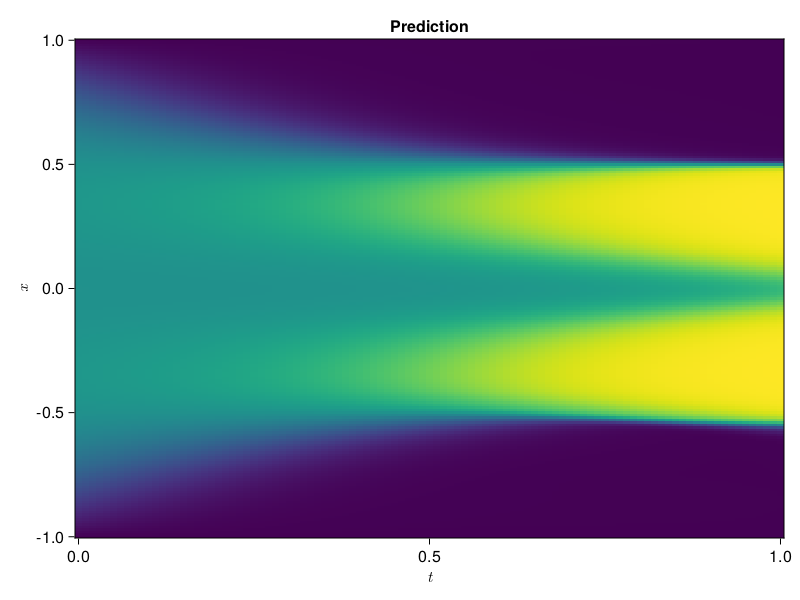

In [32]:
using CairoMakie, MakiePublication

phi = pinn.phi
xs, ts = [infimum(d.domain):0.01:supremum(d.domain) for d in allen.domain]
axis = (xlabel=L"t", ylabel=L"x", title="Prediction")
u_pred = [sum(pinn.phi([x, t], res.u)) for x in xs, t in ts]
heatmap(ts, xs, u_pred', axis=axis)

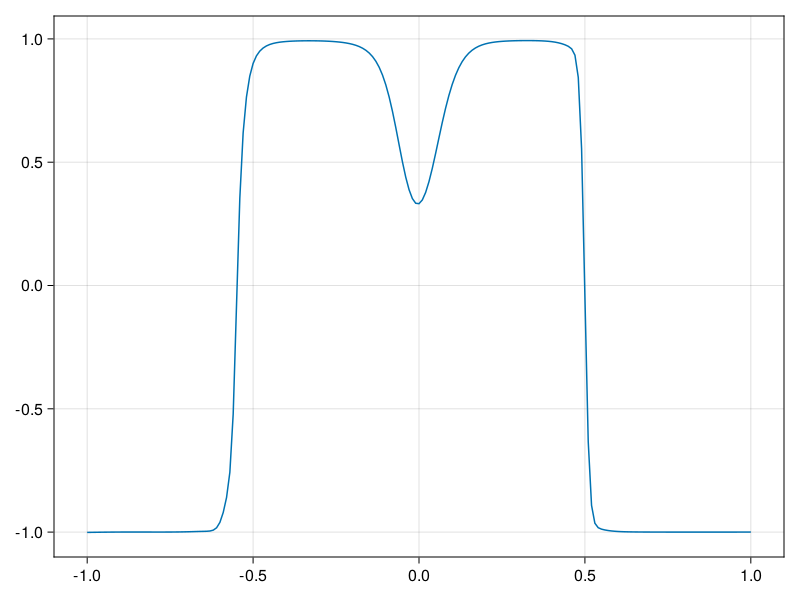

In [33]:
lines(vec(xs),vec([sum(pinn.phi([x, 1.0], res.u)) for x in xs]))

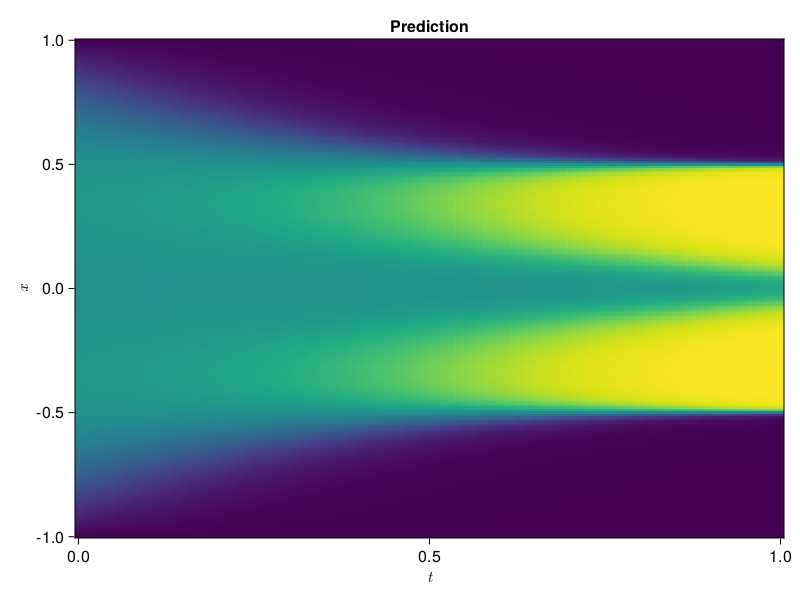

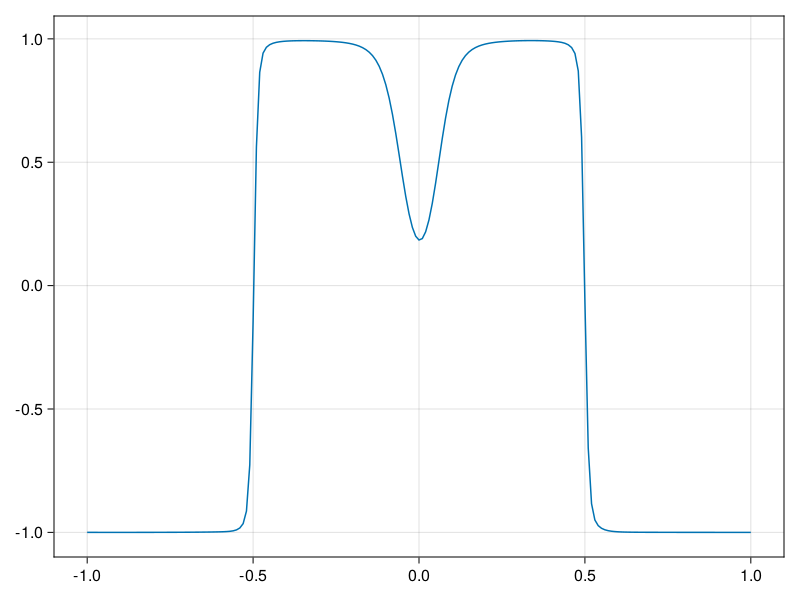

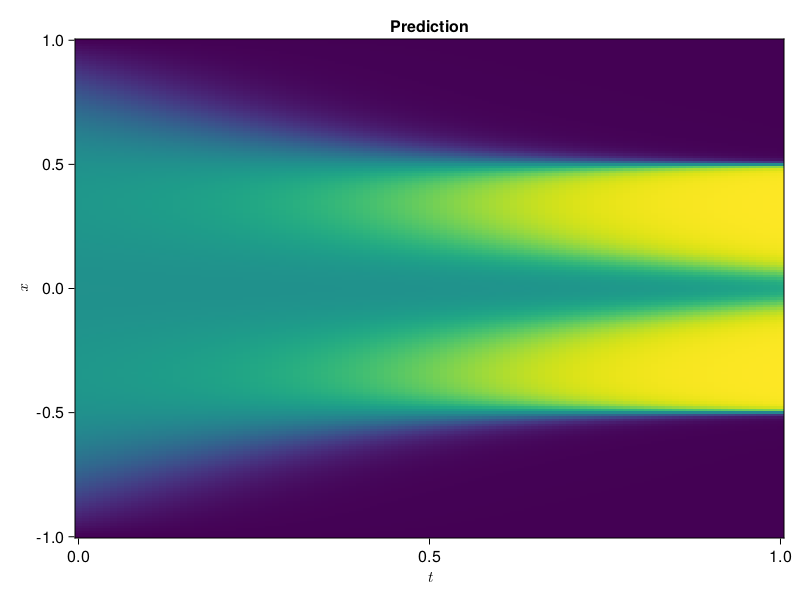

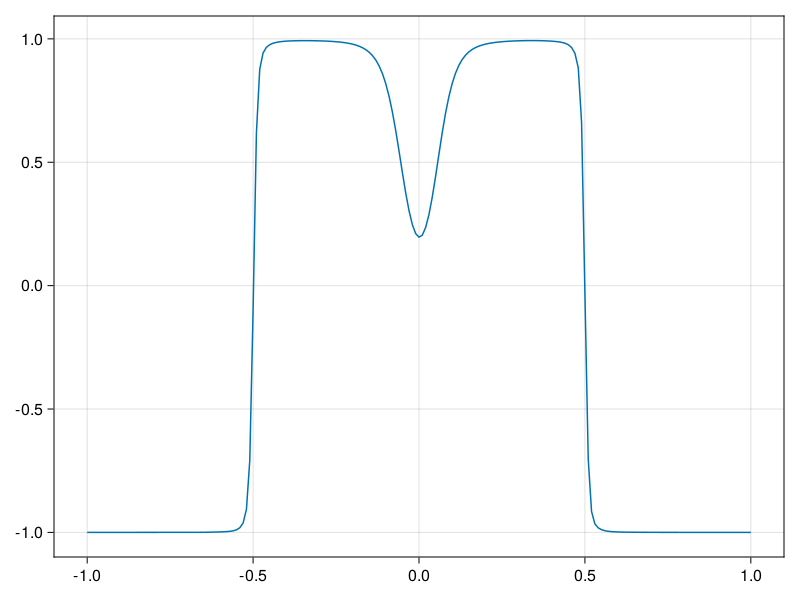

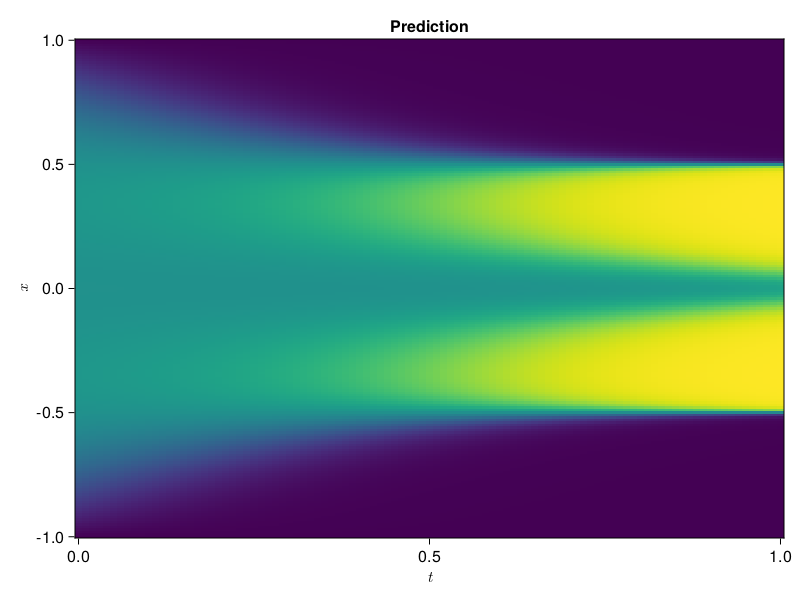

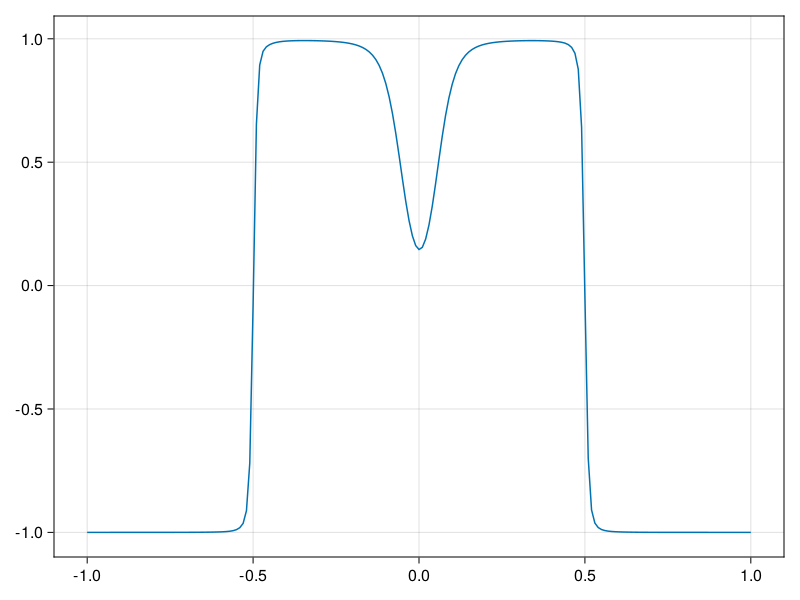

In [34]:
for α in [0.6, 0.8, 1.0] 
    sampler = remake(sampler; α=α)
    data = Sophon.sample(allen, sampler)
    prob = remake(prob; p=data, u0=res.u)
    res = Optimization.solve(prob, BFGS(); maxiters=1000)

    u_pred = [sum(pinn.phi([x, t], res.u)) for x in xs, t in ts]
    fig, ax, hm = heatmap(ts, xs, u_pred', axis=axis)
    display(fig)

    fig2 = lines(vec(xs),vec([sum(pinn.phi([x, 1.0], res.u)) for x in xs]))
    display(fig2)
end
